# Practical 6: Reinforcement Learning

Author: CAMERON STROUD

Student Number: n11552123

### Learning Outcomes:
- Implement the Q-learning and SARSA for Cliff Walking environment
- Compare the difference between these two algorithms

We will require the following library for this practical (Import all necessary libraries before running the codes):

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import time

import gymnasium as gym


import os
from IPython.display import clear_output

from tqdm import tqdm

## The Cliff Walking Environment

Cliff walking involves crossing a gridworld from start to goal while avoiding falling off a cliff. 

The game starts with the player at location [3, 0] of the 4x12 grid world with the goal located at [3, 11]. If the player reaches the goal the episode ends.

A cliff runs along [3, 1..10]. If the player moves to a cliff location it returns to the start location.

The player makes moves until they reach the goal.

The observation is the player’s current position. The action space consists of "left, down, right, up". Each time step incurs -1 reward, unless the player stepped into the cliff, which incurs -100 reward.

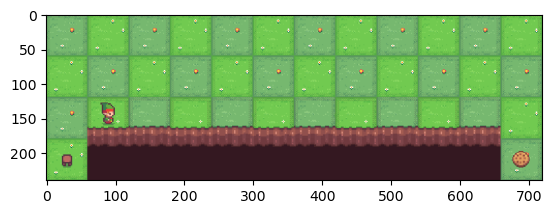

In [13]:
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)

for _ in range(20):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
        
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

## Part A: Q learning

### Q1
Observe the Cliff Walking environment, and intuitively determine the optimal path. Explain why you choose this action.

[UP, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, DOWN]  
-1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 = -13

Each step incurs a -1 reward so the least number of moves would be the optimal path. This would be ideally directly to the right but the cliffs incur -100, and a step upwards to skirt them (and downwards to reach the goal) is required.

### Q2
Implement Q learning algorithm to derive an optimal policy for Cliff Walking environment.

In [4]:
# Create an environment
env = gym.make("CliffWalking-v0")

In [35]:
def render_env(episode, iteration):
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.title(f'E{episode} k{iteration}')
    plt.show()
    env.render()

In [60]:
num_episodes = 1000  # Number of training episodes
discount_factor = 0.99  # Discount factor
learning_rate = 1  # Learning rate
exploration_rate = 1  # Probability of exploration

In [37]:

# Establish a Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in tqdm(range(num_episodes)):
    debug = False
    state,_ = env.reset()
    done = False
    k = 1
    
#     learning_rate = 1  # Learning rate
#     exploration_rate = 1  # Probability of exploration
    
    while not done:
        
        # Hint: choose an action based on epsilon-greedy policy and update Q-value using the Q-learning update rule
        ### START CODE HERE ###
        # Choose an action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state, :])

        # Perform the chosen action
        next_state, reward, terminated, truncated, _ = env.step(action)

        # Update Q-value using the Q-learning update rule
        Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_factor * np.max(Q_table[next_state, :]) - Q_table[state, action])
        state = next_state
        
        ### END CODE HERE ###
        
        k = k + 1
        learning_rate = 1 / k  # Learning rate
        exploration_rate = 1 / k  # Probability of exploration

        if terminated or truncated:
            done=True
            
        if not (k % 1000000):
            debug = True
        if debug:
            render_env(episode, k)
    # print(k)

env.close()

100%|██████████| 2000/2000 [00:01<00:00, 1342.11it/s]


In [38]:
print(Q_table)

[[ -12.09284504  -11.96566475  -11.9541471   -12.20494975]
 [ -11.25950287  -11.1830121   -11.35899128  -11.73455116]
 [ -10.44725464  -10.38990905  -10.5377361   -10.62428201]
 [  -9.59497773   -9.58776478   -9.62202674   -9.64848448]
 [  -8.8542831    -8.76602627   -8.75430774   -9.00069367]
 [  -7.98744826   -7.94039478   -7.95498289   -8.06626977]
 [  -7.15233197   -7.09734559   -7.12959275   -7.40721666]
 [  -6.3006688    -6.25327885   -6.27274198   -6.43461023]
 [  -5.44567411   -5.41749001   -5.43753762   -5.45021089]
 [  -4.57940423   -4.56365881   -4.58522468   -4.69913067]
 [  -3.81225544   -3.73400283   -3.72992651   -3.74946604]
 [  -2.92829238   -2.93531252   -2.9122044    -3.00931919]
 [ -12.74804344  -12.24087032  -12.24766853  -13.09605283]
 [ -11.85853779  -11.35509375  -11.35869664  -13.02559833]
 [ -10.91497435  -10.46021978  -10.46145235  -12.00523479]
 [ -10.03158578   -9.55645962   -9.55659131  -10.38763856]
 [  -9.15199917   -8.64377591   -8.64381237   -9.8673388

### Q3
Evaluate the optimal policy obtained by Q learning in Cliff Walking environment.

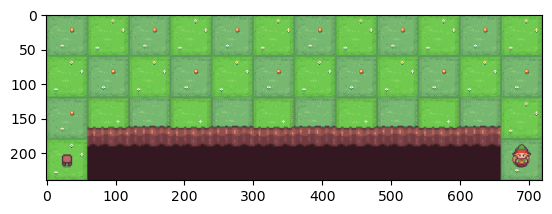

In [39]:
"""Evaluate the agent trained by Q-learning"""
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)
done = False

path = []
action_space = ['up', 'right', 'down', 'left']
while not done:
    
    # Hint: choose the action by the Q table and transit to the next state
    ### START CODE HERE ###
    action = np.argmax(Q_table[state, :])# this is where you would insert your policy
    path.append(action_space[action])
    ### END CODE HERE ###
    state, reward, terminated, truncated, info = env.step(action)
    
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()
    
    if terminated or truncated:
        done = True

env.close()

In [40]:
print(path)

['up', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'down']


### Q4
Does the optimal policy align with your initial expectation in Q1? Provide an explanation for the observed outcome.

Yes, the optimal policy aligns with my initial expectations from Q1. As the cliff has such a large cost, the Q-learning algorithm learns to avoid actions that result in those states by iterating the Q-table as it explores.

## Part B: SARSA

In [14]:
# Create an environment
env = gym.make("CliffWalking-v0")

In [99]:
num_episodes = 10000  # Number of training episodes
discount_factor = 0.99  # Discount factor
learning_rate = 1  # Learning rate
exploration_rate = 0.1  # Probability of exploration

In [100]:
# Establish a Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# SARSA algorithm
for episode in tqdm(range(num_episodes)):
    debug = False
    state, _ = env.reset()
    action = env.action_space.sample()
    done = False
    k = 1
    
    while not done:
        
        # Hint: take action and observe next state and reward, then choose the next action based on epsilon-greedy policy 
        # and update Q-table using the SARSA update rule
        ### START CODE HERE ###
        
        # Take action and observe next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)

        # Choose the next action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q_table[next_state, :])

        # Update Q-table using the SARSA update rule
        Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_factor * Q_table[next_state, next_action] - Q_table[state, action])

        state = next_state
        action = next_action
        ### END CODE HERE ###
        
        k = k + 1
        learning_rate = 1 / k  # Learning rate
        # exploration_rate = 1 / k  # Probability of exploration
        
        if terminated or truncated:
            done=True
            
        if not (k % 1000000):
            debug = True
            break
        if debug:
            render_env(episode, k)
            
print(Q_table)

100%|██████████| 10000/10000 [00:03<00:00, 2801.02it/s]

[[ -15.32836873  -14.41427061  -16.39720059  -15.54664308]
 [ -14.34365982  -13.51046835  -14.62287453  -16.02483109]
 [ -13.37514349  -12.47110662  -13.52416806  -14.57993202]
 [ -12.57969857  -11.48280437  -12.74654126  -13.70155259]
 [ -11.3891133   -10.34107641  -10.76436796  -13.01702098]
 [ -10.43552243   -9.37038869  -10.14352148  -11.62448658]
 [  -9.44435314   -8.35807878   -9.10065122  -10.56162819]
 [  -8.50724814   -7.32051187   -7.67907344   -9.53135849]
 [  -7.48792499   -6.3777397    -6.73452225   -8.68423067]
 [  -6.4354745    -5.39219693   -5.75518635   -7.5568578 ]
 [  -5.41265525   -4.65577871   -4.49343343   -6.52585751]
 [  -4.32261665   -4.45281771   -3.36228254   -5.52168215]
 [ -15.41592901  -14.34898622  -17.25036868  -15.40160554]
 [ -14.434962    -13.67060372  -17.92168925  -15.72357013]
 [ -13.63491102  -12.13874926  -14.99112227  -14.60663426]
 [ -12.47901163  -11.01570738  -13.62653275  -13.4291368 ]
 [ -11.38276158  -10.16147424  -11.96817411  -12.3654932

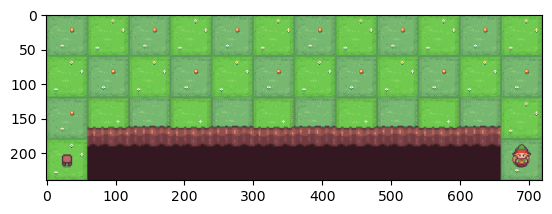

In [101]:
"""Evaluate the agent trained by Q-learning"""
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)
done = False

while not done:
    
    # Hint: choose the action by the Q table and transit to the next state
    ### START CODE HERE ###
    action = np.argmax(Q_table[state, :])# this is where you would insert your policy
    # path.append(action_space[action])
    ### END CODE HERE ###
    state, reward, terminated, truncated, info = env.step(action)
    
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()
    
    if terminated or truncated:
        done = True

env.close()

### Q5
__Does the optimal policy align with your intuition? Provide an explanation for the observed outcome.__

No, the optimal policy does not align with my intuition, as it takes seemingly two additional steps upwards, resulting in another 2 steps downwards once its aligned with the goal.

### Q6
__Do Q-learning and SARSA choose the same paths to the goal? If not, try to increase the number of SARSA's episodes and observe the result. Explain why.__

Q-learning is an off-policy algorithm, while SARSA is on-policy, resulting in different explorations of the grid. This means SARSA takes an action before updating its Q-table, while Q-learning updates based on the maximum Q-value of the next state. Increasing the number of SARSA episodes was not able to course-correct at 100,000 episodes. As SARSA applies its currently-optimal action before updating it often gets stuck taking inefficient actions (ie. switching between down and left in the starting square) and a threshold was required in the iteration count. Increasing the episode count resets the exploration rate more, which should give it ample opporutinity to discover new paths, but only within the first few iterations of an episode before it decays, and only if the exploration is initially set high enough

### Q7
__In the code of SARSA, the exploration probability is $1/k$ as in the lecture note. Now, use a constant exploration probability such as 0, 0.1, 0.2, ..., and observe the optimal policy. How will modifying this parameter impact the optimal path of SARSA? Explain the results.__

Setting the exploration rate to a constant mitigates the amount to which SARSA algorithm exploits suboptimal actions, and enables it to learn other state costs. At 10,000 episodes and an exploration rate of 0.2, SARSA no longer goes to the top, and instead takes the middle route, an improvement over the prior suboptimal policy.